In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize_experiments import (plot_roi_subject_grid, plot_average_scores, get_norm_score,
                                         plot_bo_scores, plot_perf_per_layer, plot_best_layer,
                                         plot_combined_scores)

In [66]:
num_bo_iters = 25
num_layers = 5

In [151]:
#experiment_dir = "../experiments/roi/elastic_resnet50_bo_50"
#experiment_dir = "../experiments/wb/elastic_resnet50_bo_15"

#experiment_dir = "../experiments/roi/elastic_efficientnet_b3_bo_50"
#experiment_dir = "../experiments/wb/elastic_efficientnet_b3_bo_50"

#experiment_dir = "../experiments/roi/elastic_resnext50_32x4d_bo_50"
#experiment_dir = "../experiments/wb/elastic_resnext50_32x4d_bo_50"

#experiment_dir = "../data/experiments/roi/mlp_efficientnet_b3_bo_50"
#experiment_dir = "../data/experiments/wb/mlp_efficientnet_b3_bo_30"
#experiment_dir = "../data/experiments/roi/elastic_vone_resnet50_bo_50"
#experiment_dir = "../data/experiments/wb/mlp_efficientnet_b3_bo_30"

#experiment_dir = "../data/experiments/roi/elastic_vone_resnet50_at_bo_50"
#experiment_dir = "../data/experiments/wb/elastic_vone_resnet50_at_bo_30"

#experiment_dir = "../data/experiments/roi/elastic_vone_cornets_bo_50"
#experiment_dir = "../data/experiments/wb/elastic_vone_cornets_bo_30"

#experiment_dir = "../data/experiments/roi/elastic_250_efficientnet_b3_b50"
#experiment_dir = "../data/experiments/wb/elastic_250_efficientnet_b3_b30"

#experiment_dir = "../data/experiments/roi/elastic_250_vgg_bo_50"
#experiment_dir = "../data/experiments/wb/elastic_250_efficientnet_b3_b30"
experiment_dir = "../data/experiments/roi/pls_50_resnet50_bo_25"

meta_log, hyper_log = load_result_logs(experiment_dir)

In [152]:
hyper_log.best_bo_score.mean()

0.24643750737110773

# Bayesian Optimization Procedure Across Network Feature Layers

../utils/visualize_experiments.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eval_id = hyper_log.hyper_log[hyper_log.hyper_log.subject_id == subject_id][hyper_log.hyper_log.roi_type == roi_type].run_id.iloc[0]


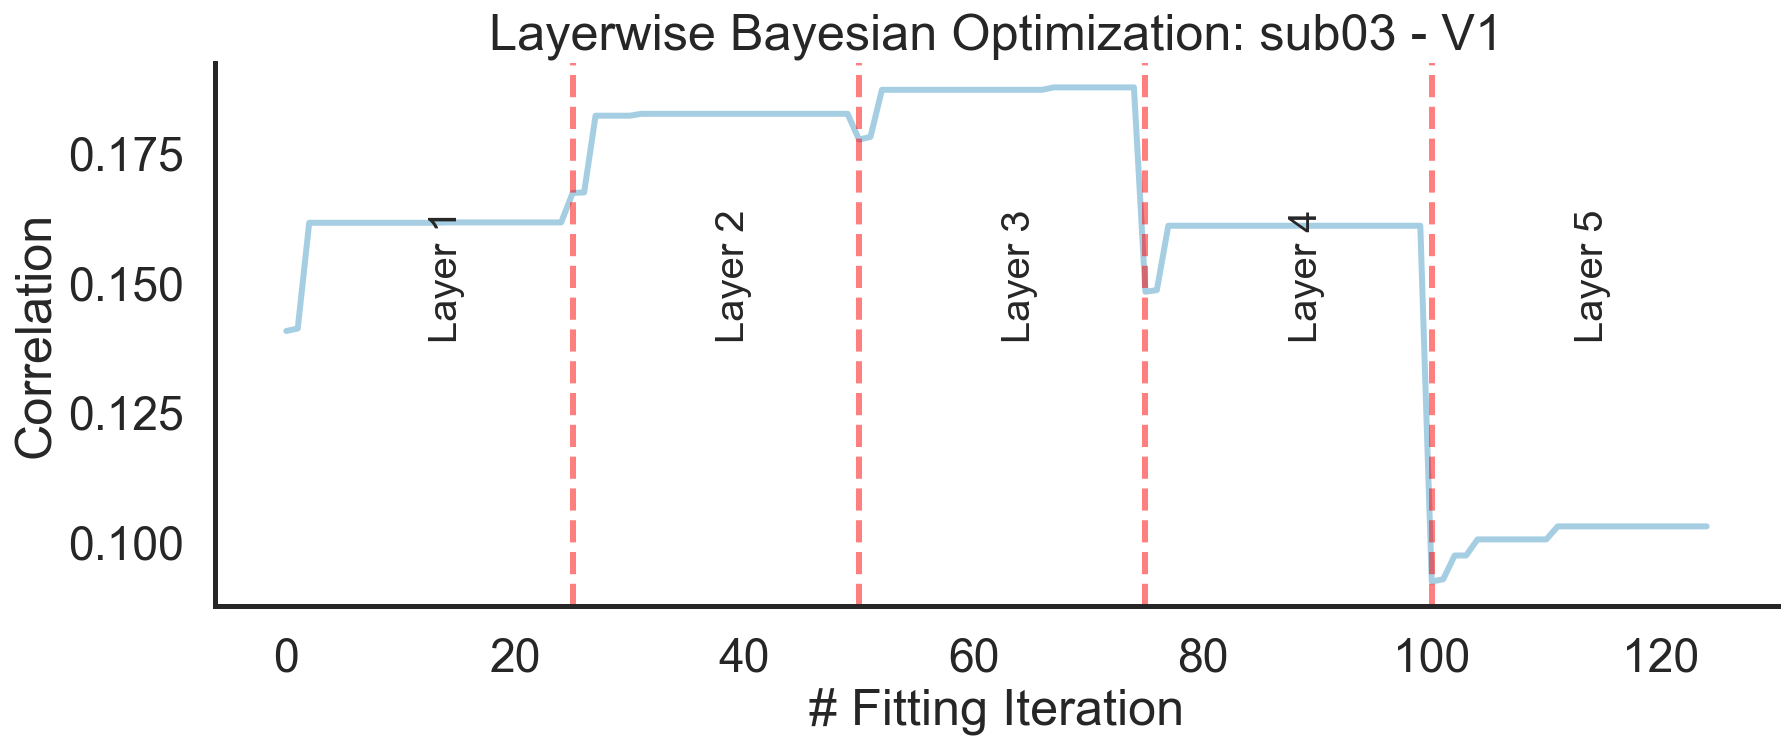

In [153]:
plot_bo_scores(meta_log, hyper_log, subject_id="sub03", roi_type="V1", num_bo_per_layer=num_bo_iters, num_layers=num_layers)

# Performance Across Subjects and ROIs

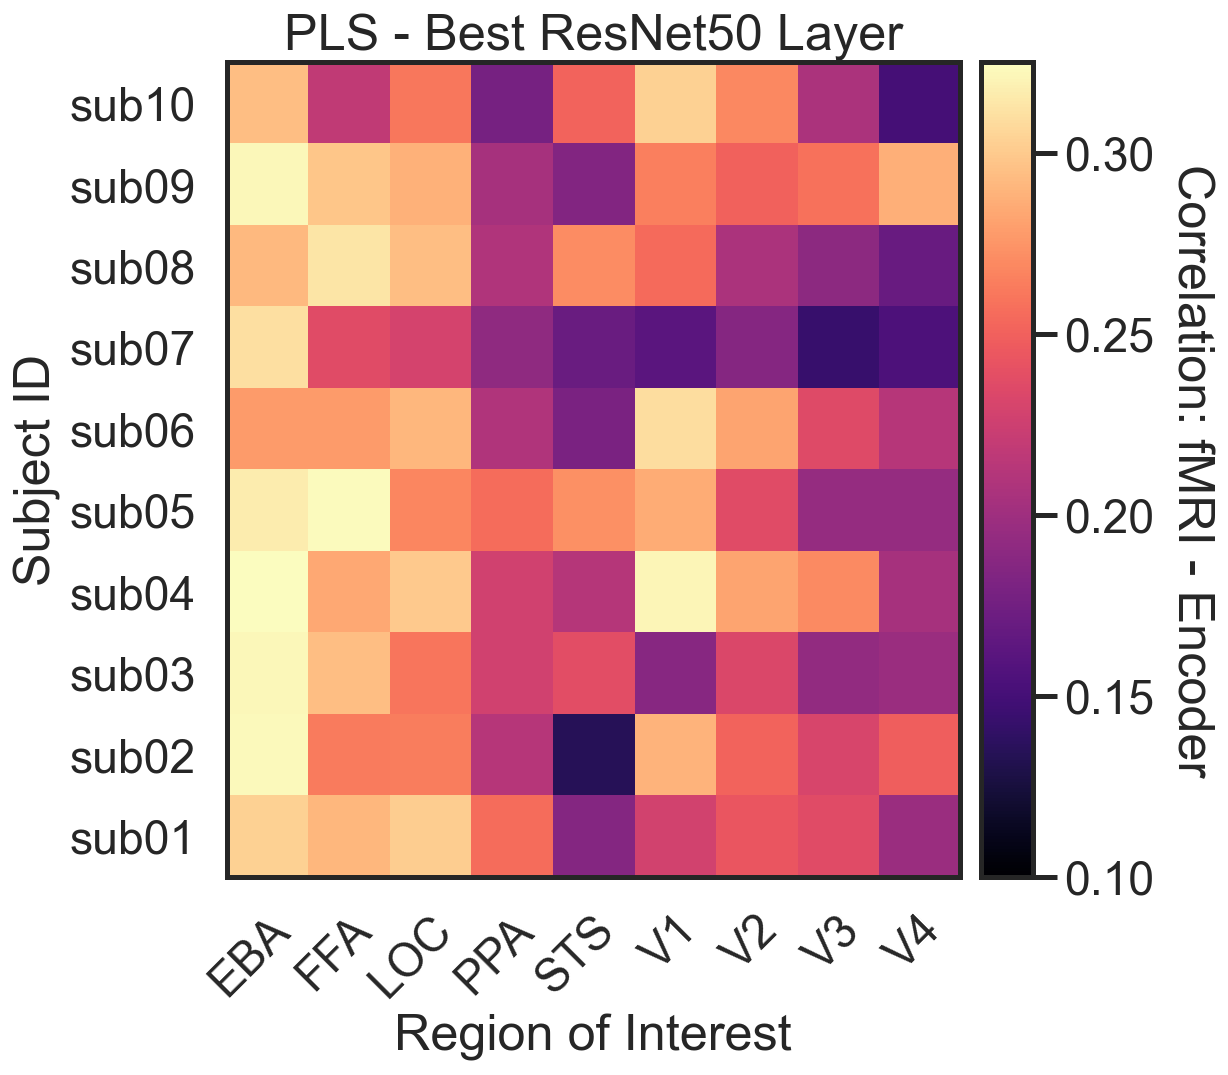

In [161]:
plot_roi_subject_grid(hyper_log, title="PLS - Best ResNet50 Layer")

[0.31392331 0.281409   0.27803447 0.22454439 0.20579314 0.26559641
 0.24598237 0.2187759  0.20665525]


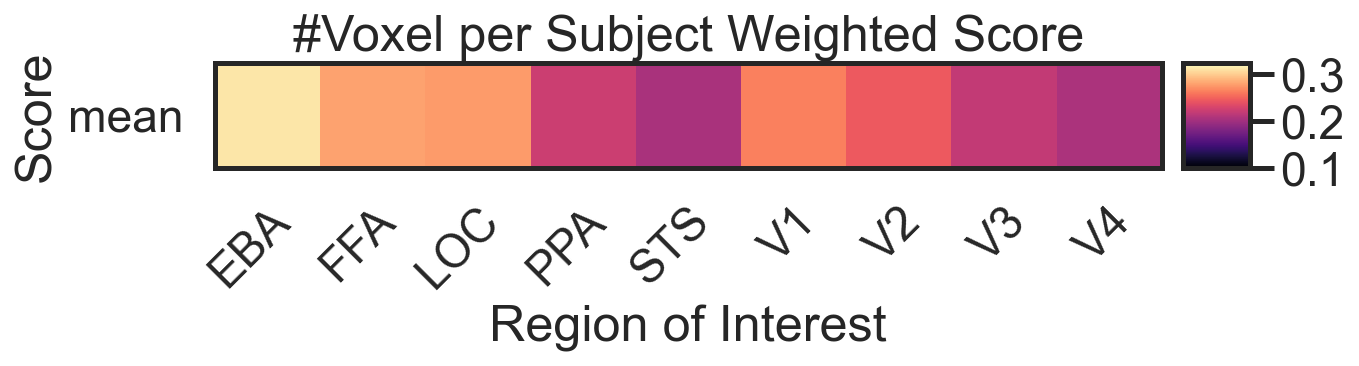

In [165]:
get_norm_score(hyper_log, plot=True)

# Performance Per Layer

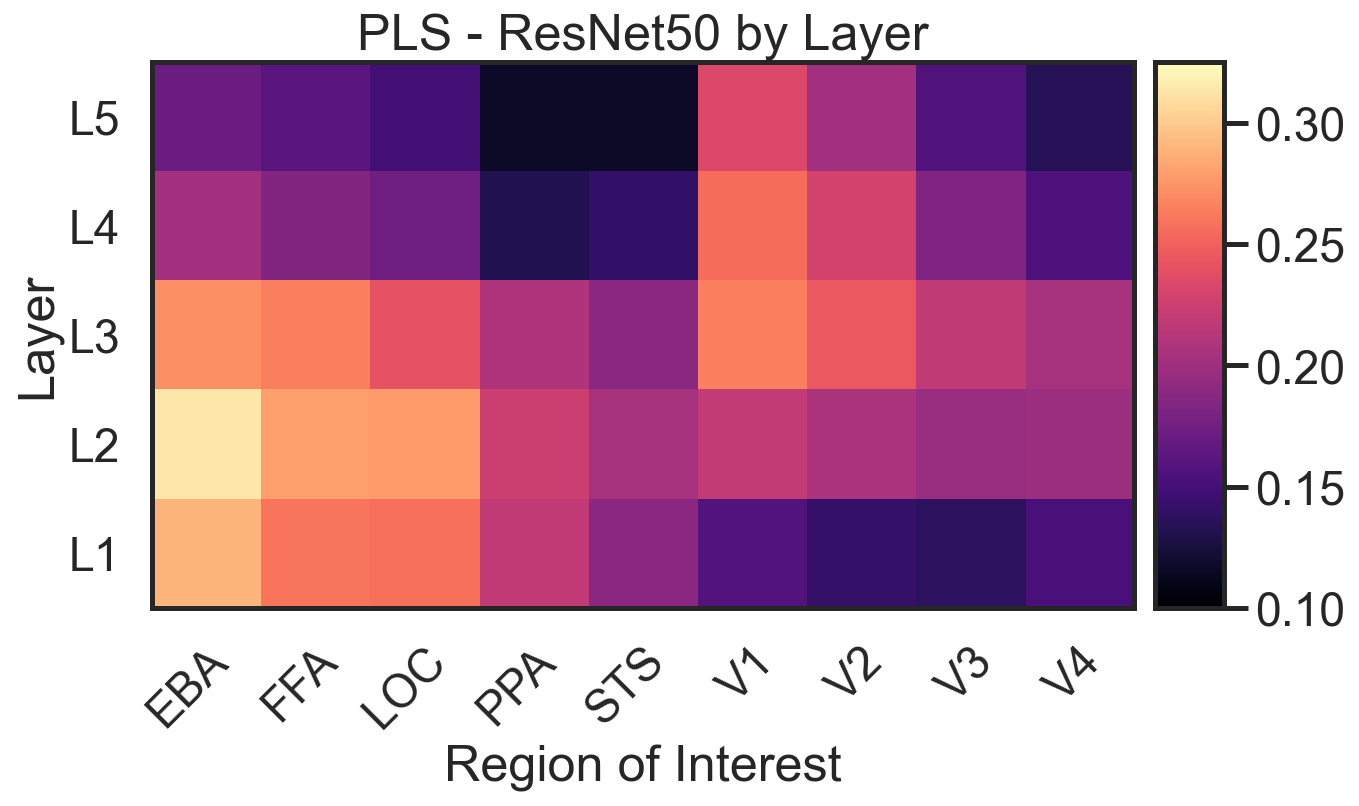

In [163]:
plot_perf_per_layer(hyper_log, meta_log, num_bo_per_layer=25, num_layers=5, title="PLS - ResNet50 by Layer")

# Combine Mean Scores Different Settings

In [148]:
meta_log_25, hyper_log_25 = load_result_logs("../data/experiments/roi/pls_25_resnet50_bo_25")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/pls_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/pls_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/pls_resnet50_bo_25")
meta_log_500, hyper_log_500 = load_result_logs("../data/experiments/roi/pls_500_resnet50_bo_25")

pca_25 = get_norm_score(hyper_log_25)
pca_50 = get_norm_score(hyper_log_50)
pca_100 = get_norm_score(hyper_log_100)
pca_250 = get_norm_score(hyper_log_250)
pca_500 = get_norm_score(hyper_log_500)

meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/pls_umap_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/pls_umap_250_resnet50_bo_25")
meta_log_500, hyper_log_500 = load_result_logs("../data/experiments/roi/pls_umap_500_resnet50_bo_25")

umap_100 = get_norm_score(hyper_log_100)
umap_250 = get_norm_score(hyper_log_250)
umap_500 = get_norm_score(hyper_log_500)

[0.307903   0.28468891 0.26998135 0.22644033 0.21348233 0.26529316
 0.24517089 0.22034619 0.21140307]
[0.31392331 0.281409   0.27803447 0.22454439 0.20579314 0.26559641
 0.24598237 0.2187759  0.20665525]
[0.29168156 0.26750864 0.25897558 0.21219818 0.18910294 0.24932589
 0.22919047 0.20299109 0.19224165]
[0.25309885 0.22247129 0.21819858 0.1713832  0.15657363 0.21602509
 0.19165082 0.16507434 0.15386375]
[0.19635673 0.1679079  0.1639535  0.13051743 0.12307389 0.16761006
 0.14921781 0.12945747 0.11813488]
[0.26471349 0.2353638  0.22609176 0.18794981 0.17798964 0.16396058
 0.1480894  0.13918291 0.15552227]
[0.26897812 0.24311549 0.23073348 0.18736747 0.17918299 0.16261722
 0.14726284 0.138182   0.15486723]
[0.26298456 0.23517291 0.22807638 0.19153996 0.17942529 0.16003675
 0.14693536 0.13828079 0.1531066 ]


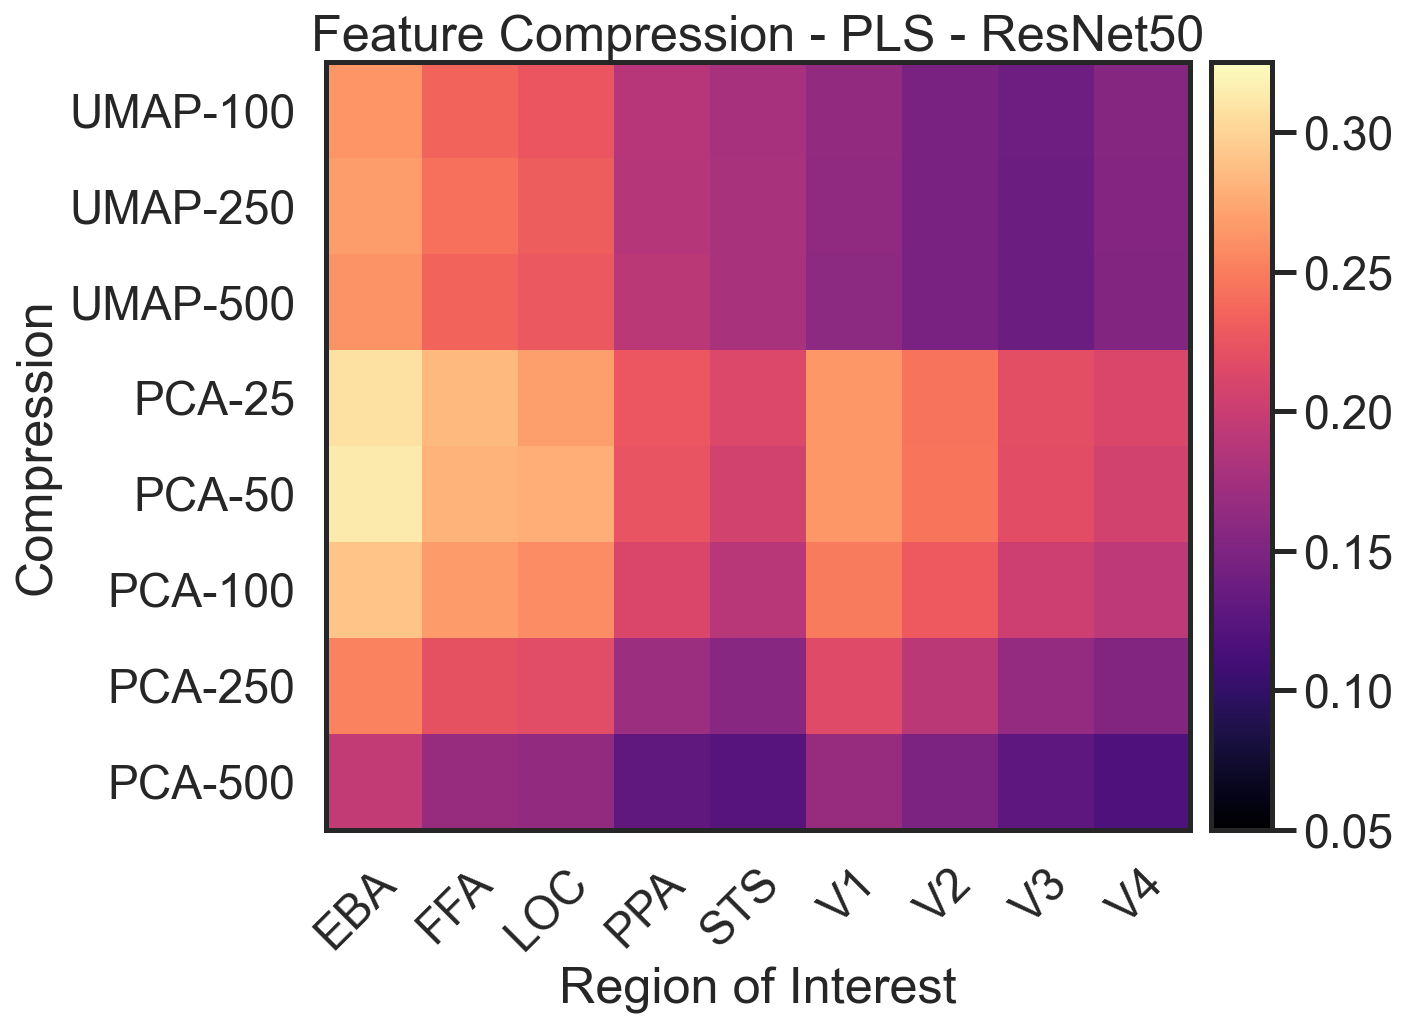

In [150]:
range_y = ["PCA-500", "PCA-250", "PCA-100", "PCA-50", "PCA-25", "UMAP-500", "UMAP-250", "UMAP-100",]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Feature Compression - PLS - ResNet50"
ylabel = "Compression"
plot_combined_scores([umap_100, umap_250, umap_500, pca_25, pca_50, pca_100, pca_250, pca_500],
                     range_x, range_y, title, ylabel,
                     min_heat=0.05, max_heat=0.325)

# Best Layer Per ROI/Subject

In [ ]:
plot_best_layer(hyper_log, meta_log, num_layers=5,
                num_bo_per_layer=50,
                title="Best Resnext50 Layer per Subject/ROI:")